In [13]:
# 代码自动完成提示 tab 键
%config IPCompleter.greedy=True

# 函数绘图
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

from scipy.integrate import odeint

import math 

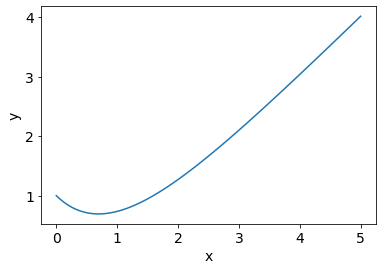

In [4]:
# 1. 一阶微分方程
# 定义 y' = f(y, x)
# 调用 odeint(y', y0, xs)

# Define a function which calculates the derivative
def dy_dx(y, x):
    return x - y

xs = np.linspace(0,5,100)
y0 = 1.0  # the initial condition
ys = odeint(dy_dx, y0, xs)
ys = np.array(ys).flatten()

# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys);

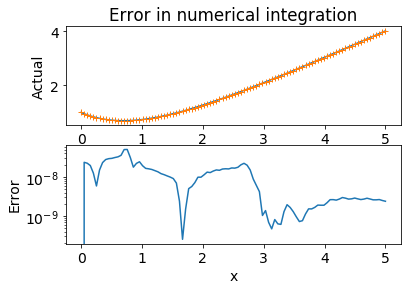

In [7]:
# analytic result
y_exact = xs - 1 + 2 * np.exp(-xs)

# 这里是 subplots 复数，后续设置属性使用 set
f, (ax1, ax2) = plt.subplots(2)

ax1.set(title = "Error in numerical integration", ylabel = "Actual")
ax1.plot(xs, ys, xs, y_exact, "+")

# 对比 analytic result 和 odeint 的差
y_diff = np.abs(y_exact - ys)

ax2.semilogy(xs, y_diff)
ax2.set(ylabel = "Error", xlabel = "x")

plt.show()

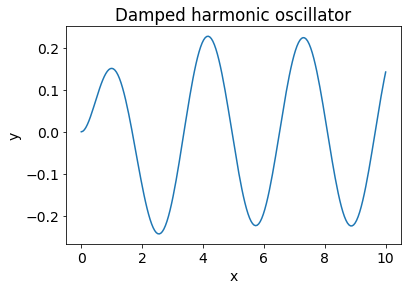

In [8]:
# y″+2y′+2y=cos(2x)
# initial values: y(0)=0,y′(0)=0

# 二阶微分方程：转化成 y, z = y' 的两个一阶方程，参数顺序控制
# 这里其实是矩阵的解法 [y, y']  --> [y', y'']


def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2 * U[1] - 2 * U[0] + np.cos(2 * x)]


U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = odeint(dU_dx, U0, xs)
ys = Us[:, 0]

plt.xlabel("x")
plt.ylabel("y")
plt.title("Damped harmonic oscillator")
plt.plot(xs, ys)

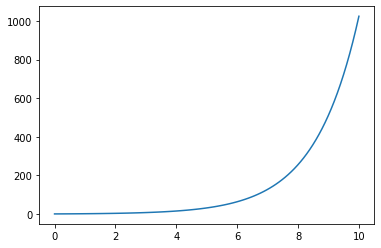

In [30]:
# eg6. 

# 定义 y'
def dy_dt(y, x): 
    return math.log(2) * y

# 设定横轴范围，初始值
xs = np.linspace(0, 10, 100)
y0 = 1

# 对应横轴每个点，计算 y 值
ys = odeint(dy_dt, y0, xs)
ys = np.array(ys).flatten()

# ys = [math.log(y) for y in ys]

plt.plot(xs, ys)


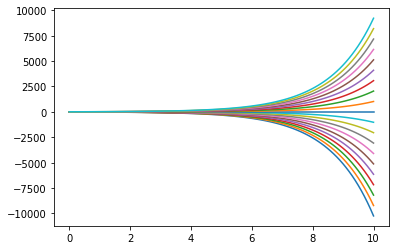

In [31]:
# 当初始值不同时，对应不同的曲线
y = np.arange(-10, 10, step = 1)

for y0 in y: 
    ys = odeint(dy_dt, y0, xs)
    ys = np.array(ys).flatten()

    plt.plot(xs, ys)

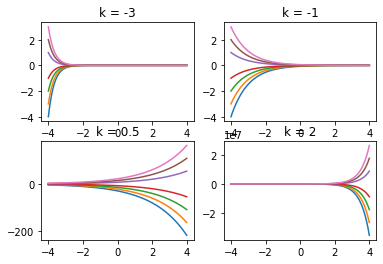

In [47]:
# figure 1.3.2
# 依然是曲线，而不是 vector field

y = np.arange(-4, 4, 1)
xs = np.linspace(-4, 4, 100)


# k 是个变量，可以取 4 个值
def draw_once(k):
    def dy_dt(y, x):
        return k * y

    for y0 in y:
        if y0 == 0:
            continue

        ys = odeint(dy_dt, y0, xs)
        ys = np.array(ys).flatten()

        plt.plot(xs, ys)

    plt.title("k = {}".format(k))


# 四张图，对比
ax_idx = 1
for k in [-3, -1, 0.5, 2]:
    plt.subplot(2, 2, ax_idx)
    draw_once(k)
    ax_idx = ax_idx + 1

In [48]:
# 另一个完整的例子
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
%matplotlib inline

(0, 6)

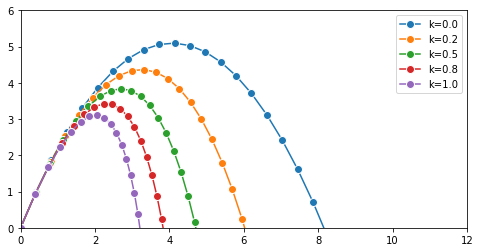

In [49]:
# u″ = (−k/m) * u′ + g

m = 1.  # particle's mass
k = 1.  # drag coefficient
g = 9.81  # gravity acceleration

# The initial position is (0, 0).
v0 = np.zeros(4)

# The initial speed vector is oriented
# to the top right.
v0[2] = 4.
v0[3] = 10.


def f(v, t0, k):
    # v has four components: v=[u, u'].
    u, udot = v[:2], v[2:]
    # We compute the second derivative u'' of u.
    udotdot = -k / m * udot
    udotdot[1] -= g
    # We return v'=[u', u''].
    return np.r_[udot, udotdot]


fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.linspace(0., 3., 30)

# We simulate the system for different values of k.
for k in np.linspace(0., 1., 5):
    # We simulate the system and evaluate $v$ on the
    # given times.
    v = spi.odeint(f, v0, t, args=(k, ))
    # We plot the particle's trajectory.
    ax.plot(v[:, 0], v[:, 1], 'o-', mew=1, ms=8, mec='w', label=f'k={k:.1f}')
ax.legend()
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)

In [62]:
v = np.array([1,2,3,4])


In [64]:
np.r_?